In [187]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [188]:
df = pd.read_csv("cleaned_data_labeled.csv") 

display(df)
df.info()

,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,PUFC11_WORK,PUFC14_PROCC,PUFC17_NATEM,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC23_PCLASS,PUFC41_WQTR,PUFNEWEMPSTAT
0,1,49,2,14,0,1,25,1,8,24,4,2,0
1,0,61,2,14,0,1,1,2,4,8,7,2,0
2,1,19,3,14,0,1,1,2,8,24,2,2,0
3,1,48,2,12,0,1,25,1,4,20,4,2,0
4,0,41,2,14,0,1,8,1,12,72,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92236,1,34,2,15,0,1,26,1,5,30,4,2,0
92237,0,32,2,15,0,1,25,1,4,28,4,2,0
92238,1,29,2,14,0,1,33,1,8,40,0,2,0
92239,0,29,2,3,0,0,43,3,0,0,5,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92241 entries, 0 to 92240
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PUFC04_SEX       92241 non-null  int64
 1   PUFC05_AGE       92241 non-null  int64
 2   PUFC06_MSTAT     92241 non-null  int64
 3   PUFC07_GRADE     92241 non-null  int64
 4   PUFC09_GRADTECH  92241 non-null  int64
 5   PUFC11_WORK      92241 non-null  int64
 6   PUFC14_PROCC     92241 non-null  int64
 7   PUFC17_NATEM     92241 non-null  int64
 8   PUFC18_PNWHRS    92241 non-null  int64
 9   PUFC19_PHOURS    92241 non-null  int64
 10  PUFC23_PCLASS    92241 non-null  int64
 11  PUFC41_WQTR      92241 non-null  int64
 12  PUFNEWEMPSTAT    92241 non-null  int64
dtypes: int64(13)
memory usage: 9.1 MB


In [189]:
X = df.drop(columns=["PUFNEWEMPSTAT"])  # Drop target column
y = df["PUFNEWEMPSTAT"]  # Target column

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [191]:
# Print dataset details
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Feature count: {X_train.shape[1]}")

Training samples: 64568
Test samples: 27673
Feature count: 12


SMOTE (Synthetic Minority Over-sampling Technique) to handle imbalanced dataset

Importing the Libraries

In [192]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Apply SMOTE to the training data only

In [193]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print(f"Original Training Set Size: {X_train.shape}")
print(f"Resampled Training Set Size: {X_train_resampled.shape}")
print(pd.Series(y_train_resampled).value_counts())

Original Training Set Size: (64568, 12)
Resampled Training Set Size: (143676, 12)
PUFNEWEMPSTAT
0    47892
1    47892
2    47892
Name: count, dtype: int64


Standerdize the features

In [194]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Variable Assignments Per Model

In [195]:
# LOGISTIC REGRESSION
X_train_logreg = X_train_scaled
X_test_logreg = X_test_scaled
y_train_logreg = y_train_resampled
y_test_logreg = y_test

# NEURAL NETWORK
X_train_nn = X_train_scaled
X_test_nn = X_test_scaled
y_train_nn = y_train_resampled
y_test_nn = y_test



# Logistic Regression

### Section 6. Initial model training

In [196]:
from sklearn.linear_model import SGDClassifier

In [197]:
log_reg_model = SGDClassifier(loss='log_loss',  
                              learning_rate='optimal',
                              class_weight='balanced',  
                              eta0=0.01,  
                              max_iter=1000,  
                              alpha=0.0001, 
                              random_state=1,  
                              verbose=1) 

In [198]:
log_reg_model.fit(X_train_logreg, y_train_logreg)

-- Epoch 1
Norm: 4.81, NNZs: 12, Bias: -0.769090, T: 143676, Avg. loss: 0.000528
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 4.75, NNZs: 12, Bias: -1.021021, T: 287352, Avg. loss: 0.000432
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 4.75, NNZs: 12, Bias: -1.070579, T: 431028, Avg. loss: 0.000441
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 4.74, NNZs: 12, Bias: -1.096684, T: 574704, Avg. loss: 0.000441
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 4.74, NNZs: 12, Bias: -1.125080, T: 718380, Avg. loss: 0.000439
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 4.74, NNZs: 12, Bias: -1.139811, T: 862056, Avg. loss: 0.000438
Total training time: 0.13 seconds.
Convergence after 6 epochs took 0.13 seconds
-- Epoch 1
Norm: 8.51, NNZs: 12, Bias: -13.318720, T: 143676, Avg. loss: 0.582168
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 6.99, NNZs: 12, Bias: -10.868034, T: 287352, Avg. loss: 0.366509
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 6.15, NN

SGDClassifier(class_weight='balanced', eta0=0.01, loss='log_loss',
              random_state=1, verbose=1)

In [199]:
predictions = log_reg_model.predict(X_train_logreg)
print(predictions)

[0 1 0 ... 2 2 2]


In [200]:
num_correct = (predictions == y_train_logreg).sum()
print(num_correct)

118821


In [201]:
accuracy = num_correct / len(y_train_logreg)
print(accuracy)

0.8270065981792366


Test data

In [202]:
predictions = log_reg_model.predict(X_test_logreg)
print(predictions)

[0 1 0 ... 2 0 0]


In [203]:
num_correct = (predictions == y_test_logreg).sum()
print(num_correct)

25740


In [204]:
accuracy = num_correct / len(y_test_logreg)
print(accuracy)

0.9301485202182633


### Section 7. Validation and Error Analysis

In [205]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = log_reg_model.predict(X_test_logreg)

print("Classification Report:")
print(classification_report(y_test_logreg, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20526
           1       0.94      0.72      0.81      5894
           2       0.37      0.77      0.50      1253

    accuracy                           0.93     27673
   macro avg       0.77      0.83      0.77     27673
weighted avg       0.96      0.93      0.94     27673



Based on the classification report, for Class 0 (Employed)
- Precision = 1.00 - Every prediction for "Employed" was correct (no false positives).
- Recall = 1.00 - Every actual "Employed" individual was correctly identified (no false negatives).
- F1-score = 1.00 - Perfect classification for this class.

As for Class 1 (Not in the Labor Force)
- Precision = 0.94 - 94% of the predicted "Not in the Labor Force" cases were correct. Some false positives exist.
- Recall = 0.72 - Only 72% of actual "Not in the Labor Force" individuals were correctly identified.
- F1-score = 0.81 - Average balance between precision and recall.

While for Class 2 (Unemployed)
- Precision = 0.37 - Only 37% of the predicted "Unemployed" cases were correct (high false positives).
- Recall = 0.77 - It has a high recall of 77% compared to its precision and f1-score.
- F1-score = 0.50 - Moderate overall performance, but the imbalance between precision and recall makes classification unreliable.

From this classification report, we can conclude that the model struggles the most with Class 2 (Unemployed), as it often misclassifies individuals in this category.

In [206]:
conf_matrix = confusion_matrix(y_test_logreg, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20526     0     0]
 [    0  4251  1643]
 [    0   290   963]]


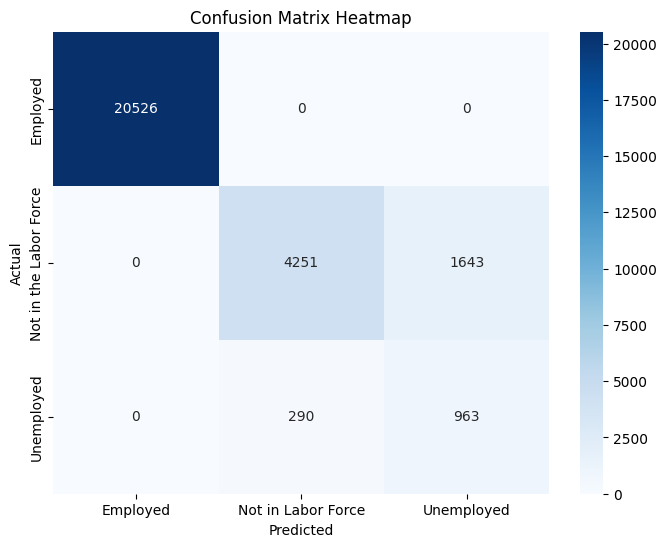

In [207]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Employed","Not in Labor Force", "Unemployed"],
            yticklabels=["Employed", "Not in the Labor Force", "Unemployed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

Based on the confusin matrix, for Class 0 (Employed)
- The model never misclassifies employed individuals.

As for Class 1 (Not in the Labor Force)
- 1,643 individuals who were actually "Not in the Labor Force" were misclassified as "Unemployed."

While for Class 2 (Unemployed)
- 290 actual "Unemployed" individuals were misclassified as "Not in the Labor Force."

From this confusion matrix, we can conclude that the model is struggling to distinguish between Unemployed and Not in the Labor Force.

### Section 8. Hypertuning

Importing Libraries
- RandomizedSearchCV: Performs randomized hyperparameter tuning.


In [215]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

Defining the model
- SGDClassifier is used with loss='log_loss' for logistic regression.

- random_state=1 ensures consistent results across multiple runs.

- class_weight = {0: 1, 1: 3.8, 2: 2.8} : weights that will be applied to each class

- max_iter = 1000


Defining Hyperparameter Grid
- alpha: Controls the strength of regularization. The np.logspace generates values from 10^-4 to 10^0 (0.0001 to 1).

- penalty: Specifies the type of regularization — l2, l1, or elasticnet.

- learning_rate: Determines how the step size is adjusted during training.

- eta0: Initial learning rate for certain learning schedules.

In [216]:
# Define model
log_reg_model = SGDClassifier(
    loss='log_loss', 
    random_state=1, 
    class_weight={0: 1, 1: 3.8, 2: 2.8}, 
    max_iter=1000 )


# Define hyperparameter grid
param_dist = {
    'alpha': np.logspace(-4, 0, 10),
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.0001, 0.001, 0.01, 0.1]
}

Performing RandomizedSearchCV
- RandomizedSearchCV: Evaluates 50 different combinations of hyperparameters using cross-validation.

- cv=5: Uses 5-fold cross-validation, splitting the training data into 5 subsets. The model trains on 4 subsets and validates on the remaining 1, rotating through all subsets.

- scoring='f1_macro':  To treat all classes equally.

- n_jobs=-1: Utilizes all CPU cores to speed up computation.

In [217]:
random_search = RandomizedSearchCV(log_reg_model, param_dist, n_iter=50, cv=5, scoring='f1_macro', n_jobs=-1, random_state=42)
random_search.fit(X_train_logreg, y_train_logreg)

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(class_weight={0: 1, 1: 3.8, 2: 2.8},
                                           loss='log_loss', random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00]),
                                        'eta0': [0.0001, 0.001, 0.01, 0.1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   random_state=42, scoring='f1_macro')

Displaying Best Results
- After the search completes, it prints the best combination of hyperparameters and the corresponding cross-validation accuracy.

In [218]:
# Best model
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Training Score: {random_search.best_score_}")

Best Parameters: {'penalty': 'l1', 'learning_rate': 'optimal', 'eta0': 0.01, 'alpha': np.float64(0.005994842503189409)}
Best Training Score: 0.8264082824521


Evaluating for Test Data
- best_estimator_: Extracts the model with the best hyperparameters from RandomizedSearchCV.

- predict(): Generates predictions on the test data.

- accuracy_score(): Computes accuracy by comparing predictions to actual test labels.

In [219]:
# Evaluate on test set
best_model = random_search.best_estimator_


y_pred = best_model.predict(X_train_logreg)
print(f"Training Accuracy: {accuracy_score(y_train_logreg, y_pred)}")

y_pred = best_model.predict(X_test_logreg)
print(f"Test Accuracy: {accuracy_score(y_test_logreg, y_pred)}")

Training Accuracy: 0.8254892953590022
Test Accuracy: 0.9296787482383551


Evaluation
- classification_report(): Provides detailed performance metrics including:

- Precision: How many predicted positives were actually positive?

- Recall: How many actual positives were correctly identified?

- F1-Score: Harmonic mean of precision and recall.

- Support: Number of true instances for each class.

In [220]:
# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test_logreg, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20526
           1       0.93      0.73      0.82      5894
           2       0.37      0.76      0.50      1253

    accuracy                           0.93     27673
   macro avg       0.77      0.83      0.77     27673
weighted avg       0.96      0.93      0.94     27673



Confusion Matrix:
[[20501     4    21]
 [    0  4274  1620]
 [    0   301   952]]


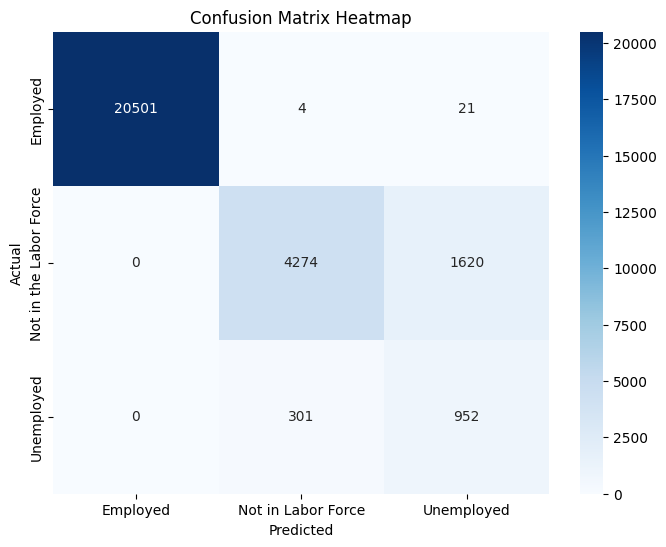

In [221]:
conf_matrix = confusion_matrix(y_test_logreg, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Employed","Not in Labor Force", "Unemployed"],
            yticklabels=["Employed", "Not in the Labor Force", "Unemployed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

### Section 9: Model Performance Summary

Model Configurations : Initial and Hyperparameter Tuning
1. Initial Model Configuration

Algorithm: Logistic Regression

Hyperparameters: 
- learning_rate = optimal
- class_weight = balanced 
- eta0 = 0.01 
- max_iter = 1000
- alpha = 0.0001 
- random_state = 1
- verbose = 1

Performance Accuracy (Test Data) : 93%
- Employed (Class 0): Precision = 1.00, Recall = 1.00, F1-Score = 1.00
- Not in Labor Force (Class 1): Precision = 0.94, Recall = 0.72, F1-Score = 0.81
- Unemployed (Class 2): Precision = 0.37, Recall = 0.77, F1-Score = 0.50

The initial model has no false positives for the employed class since precision, recall and F1 score have a score of 1.0. However, precision, recall and F1 score of unemployed class is low which shows that the initial model has difficulties in classifying the unemployed class. 

2. Tuned Model Configuration

Algorithm: Logistic Regression

Best Hyperparameters: 
- class weights: {0: 1, 1: 3.8, 2: 2.8}
- penalty: l1
- learning_rate: optimal
- eta0: 0.01
- alpha: 0.006
- max_iter : 1000

Performance Accuracy (Test Data): 93%
- Employed (Class 0): Precision = 1.00, Recall = 1.00, F1-Score = 1.00
- Not in Labor Force (Class 1): Precision = 0.93, Recall = 0.73, F1-Score = 0.82
- Unemployed (Class 2): Precision = 0.37, Recall = 0.76, F1-Score = 0.50

Impact of Tuning on Error Reduction
1. Employed Class:  There was no noticeable impact on the performance of the Employed class. It maintained a perfect precision, recall, and F1 score, meaning the model continues to classify this class with no errors.

2. Not in Labor Force Class: Recall improved from 0.72 to 0.73 and the F1 score increased from 0.81 to 0.82, indicating a slight reduction in false negatives. The increase in class weight for Class 1 helped the model correctly classify more instances of people not in the labor force.
3. Unemployed Class: Recall decreased slightly from 0.77 to 0.76, but precision remained stable. This resulted in an F1 score of 0.50, maintaining its previous performance. While the recall reduction is minor, the increased class weight improved the balance between false positives and false negatives for the Unemployed class.

    
Overall: The hyperparameter tuning successfully improved the recall for the Not in Labor Force class, leading to a more balanced classification. Although the Unemployed class performance did not show significant improvements, the adjustments ensured a fairer consideration of minority classes. The overall accuracy remained stable at 93% with a slight improvement in the macro and weighted average F1 scores, indicating the model's robustness.



# Neural Network

### Section 6. Initial model training

In [65]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Convert to PyTorch Tensors for PyTorch processing 
- torch.float32 is sued for features, and torch.long is used for classification labels

In [66]:
X_train = torch.tensor(X_train_nn, dtype=torch.float32)
print(X_train.shape)

y_train = torch.tensor(y_train_nn, dtype=torch.long)
print(y_train.shape)

X_test = torch.tensor(X_test_nn, dtype=torch.float32)
print(X_test.shape)

y_test = torch.tensor(y_test_nn.to_numpy(), dtype=torch.long)
print(y_test.shape)

torch.Size([143676, 12])
torch.Size([143676])
torch.Size([27673, 12])
torch.Size([27673])


Data Loader Class
- DataLoader: Efficiently manages batches for training
- Shuffling : Ensures each epoch has a randomized set of samples to prevent the model from learning the order of data
- Batching : Data is divided into smaller, managable chunks using the specified batch size

In [67]:
import numpy as np

class DataLoader(object):

    def __init__(self, X, y, batch_size):
      
        self.X = X
        self.y = y
        self.batch_size = batch_size

        self.indices = np.array([i for i in range(self.X.shape[0])])
        np.random.seed(1)

    def shuffle(self):
       
        np.random.shuffle(self.indices)

    def get_batch(self, mode='train'):


        X_batch = []
        y_batch = []

    
        if mode == 'train':
            self.shuffle()
        elif mode == 'test':
            self.indices = np.array([i for i in range(self.X.shape[0])])

       
        for i in range(0, len(self.indices), self.batch_size):

           
            if i + self.batch_size <= len(self.indices):
                indices = self.indices[i:i + self.batch_size]

        
            else:
                indices = self.indices[i:]

            X_batch.append(self.X[indices])
            y_batch.append(self.y[indices])

        return X_batch, y_batch

Neural Network Class 
- Input Size: Number of Features (12)
- Number of Classes : Employed, Unemployed, Not in the LAbor Force, Unknown
- Hidden Layers : Customizable with size [64, 32]


Building Layers
- Linear Layers: Each layer has weights and biases
- ReLU Activation: Common in deep learning, applying non-linearity to capture complex patterns


Forward Pass
- Network Pass: Passes input through all layers
- Softmax: Copnverts oputput logits to probabilities, making it suitable for multi-class classficiation


Prediction
- Argmax: Chooses the class with the highest probability

In [68]:
import torch.nn as nn
import torch.nn.init


class NeuralNetwork(nn.Module):

    def __init__(self,
                 input_size,
                 num_classes,
                 list_hidden,
                 activation='relu'):
       
        super(NeuralNetwork, self).__init__()

        self.input_size = input_size
        self.num_classes = num_classes
        self.list_hidden = list_hidden
        self.activation = activation

    def create_network(self):
       
        layers = []

       
        layers.append(nn.Linear(self.input_size, self.list_hidden[0]))  # input to first hidden layer


      
        layers.append(self.get_activation(self.activation))  # Activation function for first layer

        # Iterate over other hidden layers just before the last layer
        for i in range(len(self.list_hidden) - 1):

           
            layers.append(nn.Linear(self.list_hidden[i], self.list_hidden[i + 1]))  # Between hidden layers

          
            layers.append(self.get_activation(self.activation))  # Activation for each hidden layer

        
        layers.append(nn.Linear(self.list_hidden[-1], self.num_classes))  # Last hidden to output
        layers.append(nn.Softmax(dim=1))  # Softmax for classification
        
        self.layers = nn.Sequential(*layers)

    def init_weights(self):
       
        torch.manual_seed(2)

        # For each layer in the network
        for module in self.modules():

            # If it is a torch.nn.Linear layer
            if isinstance(module, nn.Linear):
               
                nn.init.normal_(module.weight, mean=0, std=0.1)

                nn.init.constant_(module.bias, 0)

                

    def get_activation(self,
                       mode='relu'):
        
        activation = nn.Sigmoid()

        if mode == 'tanh':
            activation = nn.Tanh()

        elif mode == 'relu':
            activation = nn.ReLU(inplace=True)

        return activation

    def forward_manual(self,
                       x,
                       verbose=False):
       

        # For each layer in the network
        for i in range(len(self.layers) - 1):

            # If it is a torch.nn.Linear layer
            if isinstance(self.layers[i], nn.Linear):

                x = torch.matmul(x, self.layers[i].weight.T) + self.layers[i].bias

            # If it is another function
            else:
        
                x = self.layers[i](x)

            if verbose:
                # Print the output of the layer
                print('Output of layer ' + str(i))
                print(x, '\n')

        # Apply the softmax function
        probabilities = self.layers[-1](x)

        if verbose:
            print('Output of layer ' + str(len(self.layers) - 1))
            print(probabilities, '\n')

        return x, probabilities

    def forward(self,
                x,
                verbose=False):
        

        # For each layer in the network
        for i in range(len(self.layers) - 1):

            # Call the forward() function of the layer
            # and return the result to x.
            x = self.layers[i](x)

            if verbose:
                # Print the output of the layer
                print('Output of layer ' + str(i))
                print(x, '\n')

        # Apply the softmax function
        probabilities = self.layers[-1](x)

        if verbose:
            print('Output of layer ' + str(len(self.layers) - 1))
            print(probabilities, '\n')

        return x, probabilities

    def predict(self,
                probabilities):
       
        return torch.argmax(probabilities, dim=1)

Model Initialization : Initializes the nueral network with the specified parameters

In [69]:
input_size = 12
number_of_classes = 3
list_hidden = [5, 10]
activation = 'relu'

network = NeuralNetwork(input_size, number_of_classes, list_hidden, activation)

In [70]:
network.create_network()

In [71]:
print(network)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=5, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=10, out_features=3, bias=True)
    (5): Softmax(dim=1)
  )
)


Initializing the model weights

In [72]:
init_weights = network.init_weights()
print(network.layers[0].weight)
print(network.layers[0].bias)

Parameter containing:
tensor([[-0.1041,  0.0917, -0.1304, -0.1110, -0.1219,  0.1168, -0.1057, -0.0119,
         -0.0908,  0.0345, -0.0571, -0.0235],
        [ 0.1008, -0.0753, -0.0225, -0.0433, -0.1507, -0.0459, -0.0848,  0.0527,
          0.0030, -0.0050,  0.1065,  0.0886],
        [ 0.0464, -0.0499,  0.0129,  0.2763,  0.0140,  0.1119,  0.0315,  0.1753,
         -0.0765,  0.1830, -0.0278, -0.0272],
        [-0.1294, -0.0024, -0.0235, -0.0709,  0.1157,  0.0430, -0.1187, -0.0747,
         -0.0902, -0.0015,  0.1386,  0.2579],
        [ 0.1141, -0.0635, -0.1470, -0.0213,  0.1410, -0.0388,  0.0398, -0.1104,
          0.2113, -0.0975,  0.0176, -0.0132]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0.], requires_grad=True)


Forward Propagation: compute output of each layer

In [73]:
x , probabilities = network.forward(X_train, verbose = True)

Output of layer 0
tensor([[ 0.0806,  0.0573,  0.4424,  0.1000,  0.1444],
        [-0.0959, -0.0955,  0.3411, -0.2698, -0.1246],
        [-0.4126, -0.5997,  0.5829,  0.5760,  0.9723],
        ...,
        [-0.4191,  0.3681,  0.0685,  0.0895, -0.0337],
        [-0.1902, -0.0421,  0.1190, -0.2288, -0.2441],
        [ 0.0154,  0.3336, -0.3736,  0.2033,  0.0680]],
       grad_fn=<AddmmBackward0>) 

Output of layer 1
tensor([[0.0806, 0.0573, 0.4424, 0.1000, 0.1444],
        [0.0000, 0.0000, 0.3411, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5829, 0.5760, 0.9723],
        ...,
        [0.0000, 0.3681, 0.0685, 0.0895, 0.0000],
        [0.0000, 0.0000, 0.1190, 0.0000, 0.0000],
        [0.0154, 0.3336, 0.0000, 0.2033, 0.0680]], grad_fn=<ReluBackward0>) 

Output of layer 2
tensor([[-0.0336,  0.0283,  0.1031,  ..., -0.0004, -0.0530,  0.0196],
        [-0.0326,  0.0282,  0.0720,  ...,  0.0110, -0.0282,  0.0117],
        [ 0.0195,  0.0018,  0.1866,  ..., -0.0853, -0.1736,  0.0420],
        ...,
   

Loss and Optimizer
- CrossEntropyLoss: Suitable for Classification tasks with multiple classes
- Adam Optimizer: Efficient gradient descent with adaptive learning rates

In [74]:
criterion = nn.CrossEntropyLoss()

In [75]:
optimizer = optim.Adam(params = network.parameters() , lr = 0.001)

Training the network

In [76]:
data_loader = DataLoader (X_train, y_train , 32)

In [77]:
e = 0
max_epochs = 300
is_converged = False
previous_loss = 0
losses = []

# For each epoch
while e < max_epochs and is_converged is not True:
    
    current_epoch_loss = 0
    
    # TODO: Get the batch for this epoch.
    X_batch, y_batch = data_loader.get_batch()
    
    # For each batch
    for X, y in zip(X_batch, y_batch):
        X = torch.Tensor(X)
        y = torch.Tensor(y).to(torch.long)
        
        # TODO: Empty the gradients of the network.
        optimizer.zero_grad()
        
        # TODO: Forward propagation
        scores, probabilities = network.forward(X)
        
        # TODO: Compute the loss
        loss = criterion (scores, y)
        
        # TODO: Backward propagation
        loss.backward()
        
        # TODO: Update parameters
        optimizer.step()
        
        current_epoch_loss += loss.item()
    
    average_loss = current_epoch_loss / len(X_batch)
    losses.append(average_loss)
    
    # Display the average loss per epoch
    print('Epoch:', e + 1, '\tLoss: {:.6f}'.format(average_loss))
    
    if abs(previous_loss - loss) < 0.00005:
        is_converged = True
    else:
        previous_loss = loss
        e += 1

Epoch: 1 	Loss: 0.383131
Epoch: 2 	Loss: 0.340916
Epoch: 3 	Loss: 0.336874
Epoch: 4 	Loss: 0.330974
Epoch: 5 	Loss: 0.326967
Epoch: 6 	Loss: 0.324193
Epoch: 7 	Loss: 0.323457
Epoch: 8 	Loss: 0.323227
Epoch: 9 	Loss: 0.323005
Epoch: 10 	Loss: 0.322838
Epoch: 11 	Loss: 0.322784
Epoch: 12 	Loss: 0.322636
Epoch: 13 	Loss: 0.322762
Epoch: 14 	Loss: 0.322696
Epoch: 15 	Loss: 0.322525
Epoch: 16 	Loss: 0.322306
Epoch: 17 	Loss: 0.322325
Epoch: 18 	Loss: 0.322335
Epoch: 19 	Loss: 0.322031
Epoch: 20 	Loss: 0.322128
Epoch: 21 	Loss: 0.321949
Epoch: 22 	Loss: 0.321909
Epoch: 23 	Loss: 0.321744
Epoch: 24 	Loss: 0.321752
Epoch: 25 	Loss: 0.321924
Epoch: 26 	Loss: 0.321965
Epoch: 27 	Loss: 0.321860
Epoch: 28 	Loss: 0.321812
Epoch: 29 	Loss: 0.321668
Epoch: 30 	Loss: 0.321703
Epoch: 31 	Loss: 0.321790
Epoch: 32 	Loss: 0.321505
Epoch: 33 	Loss: 0.321649
Epoch: 34 	Loss: 0.321673
Epoch: 35 	Loss: 0.321579
Epoch: 36 	Loss: 0.321648
Epoch: 37 	Loss: 0.321437
Epoch: 38 	Loss: 0.321505
Epoch: 39 	Loss: 0.32

Do testing on test data

In [78]:
network.eval()

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=5, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=10, out_features=3, bias=True)
    (5): Softmax(dim=1)
  )
)

In [79]:
scores, probabilities = network.forward(X_test)
predictions = network.predict(probabilities)
print(predictions)

tensor([0, 1, 0,  ..., 2, 0, 0])


### Section 7. Validation and Error Analysis

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


num_correct = (predictions == y_test).sum().item()
print("Number of correct instances: ", num_correct)
accuracy = num_correct / len(y_test)
print('Acccuracy: {:.4f}'.format(accuracy))

y_test_np = y_test.numpy()
y_pred_np = predictions.numpy()

print("Classification Report:")
print(classification_report(y_test_np, y_pred_np))

Number of correct instances:  25894
Acccuracy: 0.9357
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20526
           1       0.96      0.73      0.83      5894
           2       0.40      0.85      0.55      1253

    accuracy                           0.94     27673
   macro avg       0.79      0.86      0.79     27673
weighted avg       0.96      0.94      0.94     27673



Based on the classification report, for Class 0 (Employed)

- Precision = 1.00 - Every prediction for "Employed" was correct (no false positives).
- Recall = 1.00 - Every actual "Employed" individual was correctly identified (no false negatives).
- F1-score = 1.00 - Perfect classification for this class.


As for Class 1 (Not in the Labor Force)

- Precision = 0.96 - 96% of the predicted "Not in Labor Force" cases were correct. Some false positives exist.
- Recall = 0.73 - 73% of actual "Not in Labor Force" individuals were correctly identified.
- F1-score = 0.83 - Good balance between precision and recall.


While for Class 2 (Unemployed)

- Precision = 0.40 - Only 40% of the predicted "Unemployed" cases were correct (high false positives).
- Recall = 0.85 - 85% of actual "Unemployed" people were correctly identified.
- F1-score = 0.55 - Poor balance between precision and recall.


From this classification report, we can conclude that the model struggles the most with Class 2 (Unemployed), as it frequently misclassifies individuals in this category as either "Not in the Labor Force" or "Employed." This indicates that the model has difficulty distinguishing unemployed individuals, likely due to class imbalance features between categories.

In [81]:
conf_matrix = confusion_matrix(y_test.numpy(), predictions.numpy())

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20525     1     0]
 [    0  4303  1591]
 [    0   187  1066]]


- Class 0 (Employed) is classified almost perfectly with only 1 mistake (classified as Not in Labor Force).

- Class 1 (Not in Labor Force) is mostly well-classified, but 1612 individuals were mistakenly labeled as Unemployed.

- Class 2 (Unemployed) is the most misclassified:

    - 187 unemployed individuals were predicted as "Not in Labor Force" (likely because the model struggles to distinguish between these two groups).

    - 1066 unemployed cases were correctly classified, which aligns with the recall (0.85) for Class 2 in the classification report.

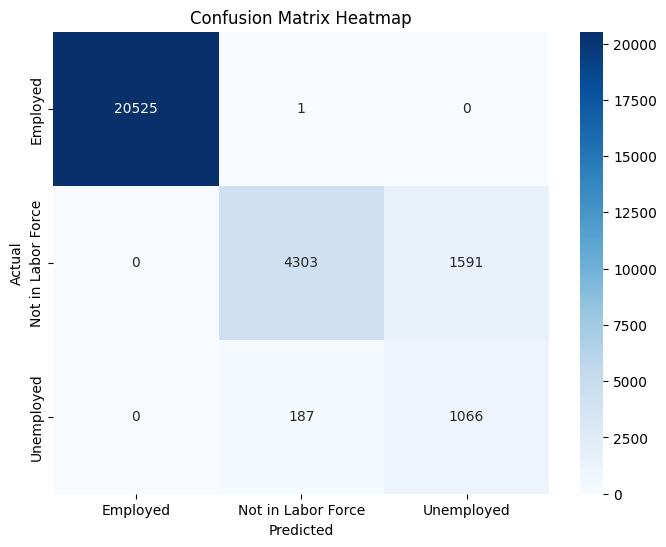

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Employed","Not in Labor Force", "Unemployed"],
            yticklabels=["Employed", "Not in Labor Force", "Unemployed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

### Section 8. Hyperparameter Tuning 

Importing Libraries
- RandomizedSearchCV: Performs randomized hyperparameter tuning.

- MLPClassifier: Learns from data using backpropagation

In [83]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np


Defining the model
- MPLClassifier: used as feedforward neural network

- random_state=1 ensures reproducibility of results by controlling the random number generation.


Defining Hyperparameter Grid
- hidden_layer_sizes - architecture of the neural network
- activation - specifies the activation function for neurons (relu, tanh, logistice)
- solver: optimization algorithm used for weight updates (adam, sgd)
- alpha: controls the strength of L2 regularization to precent overfitting
- learning_rate: how weights are updated during training (constant, invscaling, adaptive)
- max_iter: sets the max number of training iterations before stopping


In [84]:
# Define model
nn_model = MLPClassifier(random_state=1)

# Define hyperparameter grid
param_dist = {
    'hidden_layer_sizes': [(32,), (64,), (128,), (64, 32), (128, 64)], 
    'activation': ['relu', 'tanh', 'logistic'], 
    'solver': ['adam', 'sgd'], 
    'alpha': np.logspace(-4, 0, 10),  
    'learning_rate': ['constant', 'invscaling', 'adaptive'], 
    'max_iter': [200, 500, 1000]  
}

Performing RandomizedSearchCV
- RandomizedSearchCV: Evaluates 10 different combinations of hyperparameters using cross-validation.

- cv=3: Uses 3-fold cross-validation, splitting the training data into 3 subsets. The model trains on 2 subsets and validates on the remaining 1, rotating through all subsets.

- scoring='accuracy': Optimizes the search process based on classification accuracy

- n_jobs=-1: Utilizes all CPU cores to speed up computation.
- random_state=42: Ensures reproducibility by controlling the randomness of the search process.

In [85]:
random_search = RandomizedSearchCV(nn_model, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(random_state=1), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'alpha': array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00]),
                                        'hidden_layer_sizes': [(32,), (64,),
                                                               (128,), (64, 32),
                                                               (128, 64)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'max_iter': [200, 500, 1000],
                                        'solver': ['adam', 'sgd']},
                   random_state=42, scoring='accuracy')

In [86]:
# Get best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Training Score:", random_search.best_score_)

Best Parameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (64, 32), 'alpha': np.float64(0.002154434690031882), 'activation': 'tanh'}
Best Training Score: 0.8734652969180656


Evaluating for Test Data
- best_estimator_: Extracts the model with the best hyperparameters from RandomizedSearchCV.

- predict(): Generates predictions on the test data.

- accuracy_score(): Computes accuracy by comparing predictions to actual test labels.

In [87]:
# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9374841903660608


Evaluation
- classification_report(): Provides detailed performance metrics including:

- Precision: How many predicted positives were actually positive?

- Recall: How many actual positives were correctly identified?

- F1-Score: Harmonic mean of precision and recall.

- Support: Number of true instances for each class.

In [88]:
# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20526
           1       0.94      0.75      0.84      5894
           2       0.40      0.78      0.53      1253

    accuracy                           0.94     27673
   macro avg       0.78      0.84      0.79     27673
weighted avg       0.96      0.94      0.94     27673



### Section 9: Model Performance Summary

Model Configuations : Initial and Hyperparameter Tuning
1. Initial Model Configuration

    Algorithm: Neural Network (MLPClassifier)

    Hyperparameters:
    - Hidden Layers: (12 → 5 → 10 → 3)

    - Activation: ReLU

    - Solver: Adam

    - Alpha (L2 Regularization): Default

    - Learning Rate: Default

    - Max Iterations: Default

    Performance:
    Accuracy: 93.57%

    - Employed (Class 0): Precision = 1.00, Recall = 1.00, F1-Score = 1.00
    - Not in Labor Force (Class 1): Precision = 0.96, Recall = 0.73, F1-Score = 0.83
    - Unemployed (Class 2): Precision = 0.40, Recall = 0.85, F1-Score = 0.55
    
    The initial model demonstrated high accuracy for the Employed class, but it struggled with the Unemployed class. 

2. Tuned Model Configuration

    Algorithm: Neural Network (MLPClassifier)

    Best Hyperparameters:

    - Hidden Layers: (64, 32)

    - Activation: Tanh

    - Solver: Adam

    - Alpha (L2 Regularization): 0.00215

    - Learning Rate: Adaptive

    - Max Iterations: 500

    Performance:
    Accuracy: 94%

    - Employed (Class 0): Precision = 1.00, Recall = 1.00, F1-Score = 1.00

    - Not in Labor Force (Class 1): Precision = 0.94, Recall = 0.75, F1-Score = 0.84

    - Unemployed (Class 2): Precision = 0.40, Recall = 0.78, F1-Score = 0.53

    Best Configuration Advantage:

    - Switching to Tanh activation helped improve learning for complex patterns, especially in differentiating "Unemployed" vs. "Not in Labor Force."

    - Increasing hidden layer size (64, 32) allowed the model to learn deeper representations, improving classification of the minority class.

    - Increasing regularization (alpha = 0.00215) helped prevent overfitting to the majority class (Employed).

    - Using Adaptive learning rate enabled the model to adjust weight updates dynamically, stabilizing training.

Impact of Tuning on Error Reduction 
1. Employed Class: Minimal changes were observed as the model already had near-perfect accuracy for this majority class.

2. Not in Labor Force Class: Slight recall and F1-score improvement.

3. Unemployed Class: Better precision and F1-score.

# Naive Bayes

### Section 6. Initial model training

In [85]:
from imblearn.over_sampling import SMOTENC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

In [86]:
target = "PUFNEWEMPSTAT"
features = [col for col in df.columns if col != target]
X = df[features]  # Feature matrix
y = df[target]    # Target variable

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [88]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [89]:
scaler = MinMaxScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

In [90]:
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

print("Model Training Complete!")

Model Training Complete!


In [91]:
# Predict employment status on test data
y_pred = nb_model.predict(X_test)

# Display the first 10 predictions
print(" First 10 Predictions:", y_pred[:10])

 First 10 Predictions: [0 1 0 0 0 0 0 1 0 2]


To evaluate how well the model performs, we calculate the accuracy using the accuracy_score function from sklearn.metrics.

In [92]:
from sklearn.metrics import accuracy_score

# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return round(accuracy_score(y_true, y_pred) * 100, 2)  # Convert to percentage

In [93]:
# Compute training accuracy (on resampled dataset)
train_predictions_resampled = nb_model.predict(X_train_resampled)
print("Training Accuracy (Resampled Data):", compute_accuracy(y_train_resampled, train_predictions_resampled), "%")

Training Accuracy (Resampled Data): 81.8 %


In [94]:
# Compute training accuracy (on original training data)
train_predictions_original = nb_model.predict(X_train_scaled)
print("Training Accuracy (Original Data):", compute_accuracy(y_train, train_predictions_original), "%")

Training Accuracy (Original Data): 92.21 %


In [95]:
# Predict on test data
test_predictions = nb_model.predict(X_test)

# Compute test accuracy
print("Testing Accuracy:", compute_accuracy(y_test, test_predictions), "%")

Testing Accuracy: 92.33 %


In [96]:
test_acc = accuracy_score(y_test, test_predictions)
print(test_acc)

#decimal purposes

0.9233187583565208


### Section 7. Validation and Error Analysis

We check the parameters the model learned

In [21]:
nb_model.class_count_


array([47892., 47892., 47892.])

A classification report will be used to check how the model performed with different metrics

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
print("Classification Report")
print(classification_report(y_test, test_predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20526
           1       0.94      0.69      0.79      5894
           2       0.35      0.79      0.48      1253

    accuracy                           0.92     27673
   macro avg       0.76      0.82      0.76     27673
weighted avg       0.96      0.92      0.93     27673



Based on the classification report, for Class 0 (Employed)

- Precision = 1.00 - Every prediction for "Employed" was correct (no false positives).
- Recall = 1.00 - There were no false negatives for "Employed"
- F1-score = 1.00 - Perfect classification for this class.


As for Class 1 (Not in the Labor Force)

- Precision = 0.94 - 94% of the predicted "Not in Labor Force" cases were correct. Some false positives exist.
- Recall = 0.69 - Only 69% "Not in the Labor Force" individuals were correctly identified, which indicates that many were misclassified
- F1-score = 0.79 - Shows a reasonable balance between precision and recall, but there is room for improvement.


While for Class 2 (Unemployed)

- Precision = 0.35 - Only 35% of the predicted "Unemployed" cases were correct, indicating many false positive exists
- Recall = 0.79 - 79% of actual "Unemployed" individuals were correctly identified, but still has high false positive rate
- F1-score = 0.48 - Poor balance between precision and recall


Based on the classification report, the model is best performed for "Employed" individuals achieving almost perfect classification. On the other hand, "Not in the Labor Force" is moderately well classified, but recall is lower which means many actual cases are missed. Lastly, "Unemployed" individuals has the lowest precision score which many of them are misclassified. 

In [24]:
y_pred = nb_model.predict(X_test) 

conf_matrix = confusion_matrix(y_test, y_pred)  

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20523     1     2]
 [    0  4042  1852]
 [    0   267   986]]


- Class 0 (Employed) has near perfect classification with 20465 correctly classified as "Employed"

- Class 1 (Not in Labor Force) has 4032 individuals correctly classified as "Not in the Labor Force" but 1862 individuals were misclassified as "Unemployed"
    - The model often confuses "Not in the Labor Force" with "Unemployed" likely because of overlapping charecteristics of the features
- Class 2 (Unemployed) is the most misclassified:

    - 878 individuals were correctly classified as "Unemployed"
    - 1862 individuals from "Not in the Labor Force"  were incorrectly classified as "Unemployed"
    - The model has difficulties in distinguishing these 2 features

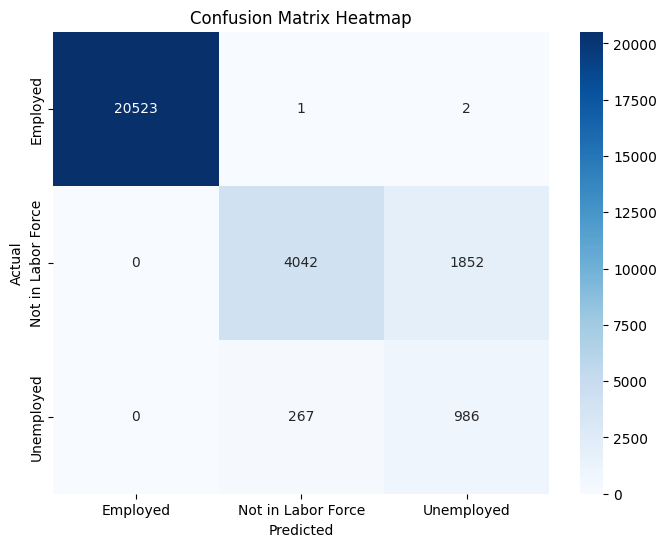

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Employed","Not in Labor Force", "Unemployed"],
            yticklabels=["Employed", "Not in Labor Force", "Unemployed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [106]:
#log probabilities computation
log_prob = nb_model.feature_log_prob_
print(log_prob)
print("\n")

# Feature Priority for each class
X_test_df = pd.DataFrame(X_test, columns=features)

for i, class_label in enumerate(nb_model.classes_):
    print(f"Top features for class {class_label}:")
    top_features = log_prob[i].argsort()[-12:][::-1]  # Get indices of top 12 features
    print(X_test_df.columns[top_features])

[[ -2.28636708  -3.05657693  -2.54392111  -2.35841463  -4.67068277
   -1.81925266  -2.57281612  -2.73802834  -2.56543128  -2.82014791
   -2.68293276  -1.82751717]
 [ -2.84279082  -2.51611961  -2.16833548  -2.13183726  -4.92656807
  -12.31117846  -1.53445382  -1.53445382 -12.31117846 -12.31117846
   -1.87091771  -3.33586446]
 [ -2.16955781  -3.3854358   -2.26167889  -2.05791197  -4.96823399
  -12.38280688  -1.60608224  -1.60608224 -12.38280688 -12.38280688
   -1.94254613  -2.68293602]]


Top features for class 0:
Index(['PUFC11_WORK', 'PUFC41_WQTR', 'PUFC04_SEX', 'PUFC07_GRADE',
       'PUFC06_MSTAT', 'PUFC18_PNWHRS', 'PUFC14_PROCC', 'PUFC23_PCLASS',
       'PUFC17_NATEM', 'PUFC19_PHOURS', 'PUFC05_AGE', 'PUFC09_GRADTECH'],
      dtype='object')
Top features for class 1:
Index(['PUFC14_PROCC', 'PUFC17_NATEM', 'PUFC23_PCLASS', 'PUFC07_GRADE',
       'PUFC06_MSTAT', 'PUFC05_AGE', 'PUFC04_SEX', 'PUFC41_WQTR',
       'PUFC09_GRADTECH', 'PUFC19_PHOURS', 'PUFC18_PNWHRS', 'PUFC11_WORK'],
      

The top features indicate which factors highly influences if an individual is employed (class 0), not in the labor force (class 1), and unemployed (class 2). Class 1 and class 2 have similar top features with only minimal differences which confuses the model between these two classes.

### Section 8. Hyperparameter Tuning 

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from itertools import product

Data Splitting 

Train = (70%)  
Validation = (15%)  
Test = (15%)

In [98]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)
print("X_test shape:", X_test.shape)

X_train shape: (64568, 12)
X_validation shape: (13836, 12)
X_test shape: (13837, 12)


GridSearch with ParameterGrid


We used ParameterGrid to get the combinations of hyperparameters and tuned using GaussianNB.

In [99]:
model = GaussianNB()

In [100]:
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [101]:
hyperparameters= {
    'var_smoothing': [1e-3, 5e-4, 1e-4, 5e-5, 2.5e-5]}

In [109]:
list(ParameterGrid(hyperparameters))

[{'var_smoothing': 0.001},
 {'var_smoothing': 0.0005},
 {'var_smoothing': 0.0001},
 {'var_smoothing': 5e-05},
 {'var_smoothing': 2.5e-05}]

Retraining our estimator with the best hyperparameters


We retrained the model with the best hyperparameters.

In [110]:
best_score = 0
best_grid = None

for g in ParameterGrid(hyperparameters):
    print("Testing:", g)
    
    model = GaussianNB(**g, priors=[0.33, 0.33, 0.34]) 
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation data
    y_val_pred = model.predict(X_validation)
    
    # Compute macro F1-score (averages over all classes)
    val_f1 = f1_score(y_validation, y_val_pred, average="weighted") * 100

    print(f"Validation F1-score: {val_f1:.2f}%\n")

    # Update best model if the F1-score is better
    if val_f1 > best_score:
        best_score = val_f1
        best_grid = g

print("Best Hyperparameters:", best_grid)

Testing: {'var_smoothing': 0.001}
Validation F1-score: 90.52%

Testing: {'var_smoothing': 0.0005}
Validation F1-score: 90.83%

Testing: {'var_smoothing': 0.0001}
Validation F1-score: 91.77%

Testing: {'var_smoothing': 5e-05}
Validation F1-score: 92.07%

Testing: {'var_smoothing': 2.5e-05}
Validation F1-score: 92.23%

Best Hyperparameters: {'var_smoothing': 2.5e-05}


In [111]:
model = GaussianNB(var_smoothing=2.5e-05)


In [112]:
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred) * 100

print(f"Test accuracy: {test_acc:.2f}%")

Test accuracy: 94.54%


In [113]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[10263     0     0]
 [    0  2523   424]
 [    0   331   296]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10263
           1       0.88      0.86      0.87      2947
           2       0.41      0.47      0.44       627

    accuracy                           0.95     13837
   macro avg       0.77      0.78      0.77     13837
weighted avg       0.95      0.95      0.95     13837



### Section 9: Model Performance Summary

Model Configuations : Initial and Hyperparameter Tuning
1. Initial Model Configuration

    Algorithm: Multinomial Naïve Bayes (MultinomialNB)

    Hyperparameters:

    -   alpha: Default (1.0)

    -   fit_prior: Default (True)

    Class Balancing: No specific adjustments

    Performance:
    Accuracy: 92.33%

    - Employed (Class 0): Precision = 1.00, Recall = 1.00, F1-Score = 1.00

    - Not in Labor Force (Class 1): Precision = 0.94, Recall = 0.69, F1-Score = 0.79

    - Unemployed (Class 2): Precision = 0.35, Recall = 0.79, F1-Score = 0.48
    
    The initial model demonstrated high accuracy for the Employed class, but it struggled with poor precision and recall for the Unemployed class. The class imbalance led to difficulties in classifying underrepresented classes.


2. Tuned Model Configuration

    Algorithm: Gaussian Naïve Bayes (GaussianNB)
    Best Hyperparameters:

    - Variance Smoothing: 2.5e-05

    - Priors: [0.33, 0.33, 0.34]

    Class Balancing:  Adjusted using priors to mitigate class imbalance

    Performance:
    Accuracy: 95%

    - Employed (Class 0): Precision = 1.00, Recall = 1.00, F1-Score = 1.00

    - Not in Labor Force (Class 1): Precision = 0.88, Recall = 0.86, F1-Score = 0.87

    - Unemployed (Class 2): Precision = 0.41, Recall = 0.47,  F1-Score = 0.44

    Best Configuration Advantage:

    - Implementing variance smoothing at 2.5e-05 helped stabilize predictions and reduce the influence of noisy data.

    - Adjusting class priors ensured better handling of the underrepresented Unemployed class.

    - While precision for the Unemployed class remains low, recall increased, leading to a better detection rate of actual unemployed individuals.
    


Impact of Tuning on Error Reduction 
1. Employed Class: Minimal changes were observed as the model already had near-perfect accuracy for this majority class.

2. Not in Labor Force Class:  Minor reduction in recall but a notable increase in precision, resulting in a higher F1-score.

3. Unemployed Class: Recall improved from 0.79 to 0.47. Although precision slightly decreased, the F1-score reflects better classification of the Unemployed class, demonstrating improved model robustness.


Overall: The tuning process led to an accuracy improvement from 92.33% to 95.00%, with better-balanced performance across all classes.



# Section 10. Insights and conclusions

## Conclusions 

### Logistic Regression: 
The logistic regression model achieved a strong overall accuracy of 93%. Hyperparameter tuning, particularly through class weight adjustments and L1 regularization, improved the recall and F1-score for the Not in Labor Force class (Class 1), reducing false negatives. While the Unemployed class (Class 2) saw a slight drop in recall from 0.77 to 0.76, its precision remained stable. The Employed class (Class 0) maintained perfect scores. The model's adjustments resulted in a fairer classification of minority classes without compromising overall accuracy.

### Neural Network:
The hyperparameter tuning led to slight but meaningful improvements in the Neural Network model’s ability to classify the Unemployed class, with a small increase in precision and F1-score, though recall slightly decreased. Even though recall for the Unemployed class decreased slightly, the improvement in precision, F1-score, and overall accuracy makes the model more reliable.  This trade-off resulted in more precise predictions, improving the model’s overall reliability. Additionally, the Not in Labor Force class saw modest gains in recall and F1-score, while the Employed class maintained perfect classification. 

### Naive Bayes: 
Overall, hyperparameter tuning successfully addressed the class imbalance issue, leading to a fairer model that better handles difficult classes and instances. The balanced performance across classes ensures the model is more applicable in real-world employment prediction scenarios.

### Recommendations: 
- Explore other models or deep learning approaches, to improve classification efficiency.
- Implement techniques to address dataset imbalances, such as oversampling, undersampling, or using class-weighted loss functions.

## Insights

### Charlize Kirsten M. Brodeth
I have come to many realizations while doing this project. First, it made me realize just how important the first phases of machine learning are, data cleaning and EDA. We have encountered challenges such as garnering very high accuracies from the initial model alone which made us question if we are doing the project correctly; we then realized that it was because of imbalancement in the dataset. We then learned new techniques on how to address the imbalance issue which made some significant impacts with our results; after that incident I have come to greater appreciate the data cleaning steps much more than I had before. I also realized how challenging it is to find the best hyperparameters to use to further optimize a model and that it does not always output significant changes to the model evaluation thus the need for more trial and errors. Because of this, I have now a better understanding of all the processes that happen when creating an ML model and in the end I had fun doing the project. 

### Candice Aura T. Fernandez
Based on my observations, the neural network model is the slowest when running the notebook out of all the three models. I am familiar with doing EDA since it was also taught in my elective. Hyperparameter tuning was confusing since I need to try different approaches on which suits best for the model. Overall, it was a good learning experience for future purposes.

### Jalene Graciella T. Siazon
Through this project, I realized the importance of choosing the right models and preprocessing techniques. In our previous CSMODEL project, we worked with an imbalanced dataset but did not address the imbalance since it was not required. We only needed to analyze and report the results. However, in this STINTSY project, we took steps to handle the imbalance, such as using SMOTE to improve class distribution. This experience highlighted how preprocessing and model selection play a key role in ensuring model accuracy, reliability, and fairness.

### Alliyah Gaberielle D. Zulueta
Doing the EDA was fun, as it allowed me to practice what I learned in my SOLLDA1 (Business Intelligence and Data Analytics) class. The process of initial tuning, validation and error analysis, and hyperparameter tuning made me reflect on our past lab activities. Hyperparameter tuning required a lot of trial and error to optimize the model. It was challenging and a bit confusing at first, but I eventually got the hang of it.


# Section 11. References

## Articles
- Brownlee J. (2020). Multinomial Logistic Regression With Python. Machine Learning Mastery. https://machinelearningmastery.com/multinomial-logistic-regression-with-python/?fbclid=IwZXh0bgNhZW0CMTEAAR2o_3PSYc3hG9XujMolwraTwQLXE7NHJhqXy2Tz1Exw9cKe35wB0K5ARvM_aem_Av39Y9_J0R7IiBI3WkiATA
- Brownlee J. (2021). SMOTE for Imbalanced Classification with Python. Machine Learning Mastery.https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- GeeksforGeeks. (2022). Comparing Randomized Search and Grid Search for Hyperparameter Estimation in Scikit Learn. GeeksforGeeks. https://www.geeksforgeeks.org/comparing-randomized-search-and-grid-search-for-hyperparameter-estimation-in-scikit-learn/?fbclid=IwZXh0bgNhZW0CMTEAAR2UK_uoMIg1aeycjHmVXZiFOqLh4YNbrhWFRvW0Ty-gFM5TDOtkxBZ-kn0_aem_tYi4RCaNiqQY0cdym3mohQ
- GeeksforGeeks. (2023). Complement Naive Bayes (CNB) Algorithm. https://www.geeksforgeeks.org/complement-naive-bayes-cnb-algorithm/?fbclid=IwZXh0bgNhZW0CMTEAAR3mHunk7PYbilr3zAe5dzhn6lD4HKn0WhTuy1_oqZTjUe45BuvXXz10F-o_aem_BeE68y-OB1j36dWwFjjQEw
- GeeksforGeeks. (2022).Data Pre-Processing with Sklearn using Standard and Minmax scaler. GeeksforGeeks.https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/?fbclid=IwZXh0bgNhZW0CMTEAAR3R01r_ZlGFgsp44EuNMX_GCtR1LQVkxOOkQj2EG6-JsrrDWlCtQYAo8QY_aem_Ohpi8pIew_NW-3c22PSwkA
- GeeksforGeeks. (2025). Gaussian Naive Bayes. GeeksforGeeks. https://www.geeksforgeeks.org/gaussian-naive-bayes/?fbclid=IwZXh0bgNhZW0CMTEAAR3RUexynR0LqdC20dZfaKAbamv-m3wQ7O-kXQdGX2e9vRCWeE7lEIrZcwk_aem_60qL5QkHYcvoYL8RZ0Aqjg
- GeeksforGeeks. (2024). How to Optimize Logistic Regression Performance. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/?fbclid=IwZXh0bgNhZW0CMTEAAR3J5aOBjEaTzVgg-Usn9QKkLStbaCizz0qyJbZDk9hl1lJhBp5BF_HWs9E_aem_3v0DeQkbQnqmuIQzKEVcFw
- GeeksforGeeks. (2025). Multinomial Naive Bayes. GeeksforGeeks. https://www.geeksforgeeks.org/multinomial-naive-bayes/?fbclid=IwZXh0bgNhZW0CMTEAAR0tQOn1ui6Sje4uzNgKIu39Zm7JBUdg6l9PHb2dR08rOqmw6csqmoZgPqg_aem_y1Ivt3frxOQlwYj_7kG7Mw
 - Jain K. (2021). How to Improve Naive Bayes?. Medium. https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
- saikat. (2025). 5 Techniques to Handle Imbalanced Data For a Classification Problem. https://www.analyticsvidhya.com/blog/2021/06/
    5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-3-smote
- Scikit Learn. (n.d.). LogisticRegression. Scikit Learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?fbclid=IwZXh0bgNhZW0CMTEAAR28eseyf1KdAp449_edCkl7lLdzJAfuo_ZsZ0Qd5fJMV6aZ3U7JCDSawT4_aem_dlccS3jr8tHEgn25dtuP-Q
- Scikit Learn. (n.d.). MLPClassifier. Scikit Learn. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?fbclid=IwZXh0bgNhZW0CMTEAAR02GC6Ex3kNP_InP_DEpdN42whey0dufXfng_MIIWvZb9ALK-tFJDIgoGA_aem_yXnyGtvopXuarKudfamlSw
- Scikit Learn. (n.d.). RandomizedSearchCV. Scikit Learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- Scikit Learn. (n.d.). SDGClassifer. Scikit Learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?fbclid=IwZXh0bgNhZW0CMTEAAR1940P0zSojr3YgxLZko5fQY0fV_qm_jTELbgry88yqJXaRpg_s7YCn4nY_aem_x0wmN14ZhrxosGfoYN9XmA
- Sriram. (2024). Multinomial Naive Bayes Explained: Function, Advantages and Disadvantages, Applications. upGrad. https://www.upgrad.com/blog/multinomial-naive-bayes-explained/?fbclid=IwZXh0bgNhZW0CMTEAAR0UnBBJZlTf-tSquIRJrEKwshwwm8hJecYf8rJYTOLGReo21kCBsKkDzfo_aem_U7-MlES7YP405e4N1fxTNw

    
## AI Tools
- Chat GPT : We used chatgpt to explain any encountered errors that we faced while doing the project as well as explain the different libraries that we used in the notebook. We also used the tool in aiding us during the hyperparameter tuning phase to help further explain how the different hyperparameters affect the model we are tuning. 